In [2]:
import netCDF4
import xarray as xr
import os
import glob
import numpy as np

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [3]:
amp_x1=xr.open_dataset('/work/ALT/odatis/eNATL60/outputs/pytide/eNATL60miX1-BLBT02_tidal_amp_y2009m07-y2010m06.nc')
amp_x2=xr.open_dataset('/work/ALT/odatis/eNATL60/outputs/pytide/eNATL60miX2-BLBT02_tidal_amp_y2009m07-y2010m06.nc')


In [4]:
amp_x1

<xarray.Dataset>
Dimensions:    (freq: 4729, x: 4177, y: 5)
Dimensions without coordinates: freq, x, y
Data variables:
    tidal-amp  (y, freq, x) float64 ...

In [5]:
amp_x2

<xarray.Dataset>
Dimensions:    (freq: 4729, x: 4177, y: 5)
Dimensions without coordinates: freq, x, y
Data variables:
    tidal-amp  (y, freq, x) float64 ...

In [6]:
amp_x1_rename=amp_x1.rename({'freq':'Y','x':'X','y':'FREQ_TIDE'})

In [7]:
amp_x1_rename

<xarray.Dataset>
Dimensions:    (FREQ_TIDE: 5, X: 4177, Y: 4729)
Dimensions without coordinates: FREQ_TIDE, X, Y
Data variables:
    tidal-amp  (FREQ_TIDE, Y, X) float64 ...

In [9]:
amp_x2_rename=amp_x2.rename({'freq':'Y','x':'X','y':'FREQ_TIDE'})

In [10]:
amp_x2_rename

<xarray.Dataset>
Dimensions:    (FREQ_TIDE: 5, X: 4177, Y: 4729)
Dimensions without coordinates: FREQ_TIDE, X, Y
Data variables:
    tidal-amp  (FREQ_TIDE, Y, X) float64 ...

In [11]:
amp=xr.concat([amp_x1_rename,amp_x2_rename], dim='X')

In [12]:
amp

<xarray.Dataset>
Dimensions:    (FREQ_TIDE: 5, X: 8354, Y: 4729)
Dimensions without coordinates: FREQ_TIDE, X, Y
Data variables:
    tidal-amp  (FREQ_TIDE, Y, X) float64 nan nan nan nan nan ... nan nan nan nan

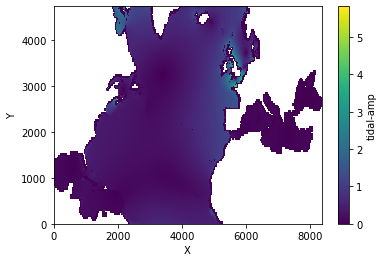

In [24]:
amp['tidal-amp'][0].plot()

In [17]:
amp.to_netcdf(path='/work/ALT/odatis/eNATL60/outputs/pytide/eNATL60-BLBT02_tidal_amp_y2009m07-y2010m06.nc',engine='scipy')


In [16]:
phase_x1=xr.open_dataset('/work/ALT/odatis/eNATL60/outputs/pytide/eNATL60miX1-BLBT02_tidal_phase_y2009m07-y2010m06.nc')
phase_x2=xr.open_dataset('/work/ALT/odatis/eNATL60/outputs/pytide/eNATL60miX2-BLBT02_tidal_phase_y2009m07-y2010m06.nc')
phase_x1_rename=phase_x1.rename({'freq':'Y','x':'X','y':'FREQ_TIDE'})
phase_x2_rename=phase_x2.rename({'freq':'Y','x':'X','y':'FREQ_TIDE'})
phase=xr.concat([phase_x1_rename,phase_x2_rename], dim='X')
phase.to_netcdf(path='/work/ALT/odatis/eNATL60/outputs/pytide/eNATL60-BLBT02_tidal_phase_y2009m07-y2010m06.nc',engine='scipy')
